# Analyze article topics using LDA 
---

### Objective:

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction import text
import pickle

In [80]:
df_wildfire = pd.read_csv('../data/wildfire.csv')
df_earthquake = pd.read_csv('../data/earthquake.csv')
df_flood = pd.read_csv('../data/flood.csv')

In [118]:
df_wildfire.head()

,content,description,title,url,text
0,"After years of playing with fire, Kevin Cooley...",Kevin Cooley nearly lost his house to the La T...,A Wildfire Was Extra Close to Home for This LA...,https://www.wired.com/story/la-tuna-wildfire-p...,A Wildfire Was Extra Close to Home for This LA...
1,The Weather Channel wants to put you in the mi...,The Weather Channel wants to put you in the mi...,Watch a wildfire spark to life in high-tech We...,https://mashable.com/video/weather-channel-wil...,Watch a wildfire spark to life in high-tech We...
2,Boeing has reportedly been struck in a major w...,Boeing has reportedly been struck in a major w...,Boeing reportedly hit by Wannacry ransomware,http://techcrunch.com/2018/03/28/boeing-report...,Boeing reportedly hit by Wannacry ransomwareBo...
3,I first heard about Colorado’s Spring Fire on ...,The state's third-largest wildfire ever burned...,How a Team of Experts Quelled Colorado's Enorm...,https://www.wired.com/story/how-a-team-of-expe...,How a Team of Experts Quelled Colorado's Enorm...
4,"""In supporting first responders in the Mendoci...","Earlier this week, Verizon came under fire for...",Verizon lifts data speed caps for wildfire res...,https://www.engadget.com/2018/08/24/verizon-li...,Verizon lifts data speed caps for wildfire res...


In [81]:
df_wildfire.isna().sum()

content        126
description      0
title            0
url              0
text           126
dtype: int64

In [82]:
df_earthquake.isna().sum()

content        86
description     2
title           0
url             0
text           86
dtype: int64

In [83]:
df_flood.isna().sum()

content        82
description     0
title           0
url             0
text           82
dtype: int64

In [84]:
df_wildfire.fillna('', inplace=True)
df_earthquake.fillna('', inplace=True)
df_flood.fillna('', inplace=True)

In [85]:
df_wildfire.isna().sum()

content        0
description    0
title          0
url            0
text           0
dtype: int64

In [109]:
# Instantiate and vectorize data using TFIDF
my_stop_words = list(ENGLISH_STOP_WORDS)
wf_vect = TfidfVectorizer(stop_words=my_stop_words, token_pattern='[a-zA-Z]+', min_df=5, max_features=5000)
wf_fit = wf_vect.fit(df_wildfire['text'])
wf_transform = wf_fit.transform(df_wildfire['text']).toarray()
wildfire_tf = pd.DataFrame(wf_transform, columns = wf_fit.get_feature_names())

eq_vect = TfidfVectorizer(stop_words=my_stop_words, token_pattern='[a-zA-Z]+', min_df=5, max_features=5000)
eq_fit = eq_vect.fit(df_earthquake['text'])
eq_transform = eq_fit.transform(df_earthquake['text']).toarray()
earthquake_tf = pd.DataFrame(eq_transform, columns = eq_fit.get_feature_names())

fl_vect = TfidfVectorizer(stop_words=my_stop_words, token_pattern='[a-zA-Z]+', min_df=5, max_features=5000)
fl_fit = fl_vect.fit(df_flood['text'])
fl_transform = fl_fit.transform(df_flood['text']).toarray()
flood_tf = pd.DataFrame(fl_transform, columns = fl_fit.get_feature_names())

In [111]:
wildfire_tf.shape

(1000, 5000)

In [112]:
def display_topics(model, feature_names, no_words = 10, plot = False, plot_dim=(5,2)):
    
    topics_tokens = []
    for topic_idx, topic in enumerate(model.components_):
        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        topic_words = [(token, counts)
                       for token, counts in topic[:-no_words - 1:-1]]
        topics_tokens.append(topic_words)
        if not plot:
            print ("Topic %d:" % (topic_idx))
            print (topic_words)
        
    
    if plot:
        plot_matrix = np.arange(10).reshape(5,2)
        fig, ax = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
        topics = [
            {key: value for key, value in topic} 
                  for topic in topics_tokens
        ]
        row = 0
        for topic_id, topic in enumerate(topics):
            column = (0 if topic_id % 2 == 0 else 1)
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
            row += 1 if column == 1 else 0
        
        plt.tight_layout()

In [168]:
wf_lda = LatentDirichletAllocation(n_components=4, learning_method="batch", random_state=42, doc_topic_prior=0.5)
wildfire_model = wf_lda.fit(wildfire_tf)
pickle.dump(wildfire_model, open('../pickles/wildfire_2.pk', 'wb'))

eq_lda = LatentDirichletAllocation(n_components=4, learning_method="batch", random_state=42, doc_topic_prior=0.5)
earthquake_model = eq_lda.fit(earthquake_tf)
pickle.dump(earthquake_model, open('../pickles/earthquake_2.pk', 'wb'))

fl_lda = LatentDirichletAllocation(n_components=4, learning_method="batch", random_state=42, doc_topic_prior=0.5)
flood_model = fl_lda.fit(flood_tf)
pickle.dump(flood_model, open('../pickles/flood_2.pk', 'wb'))

In [114]:
wildfire_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.5,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

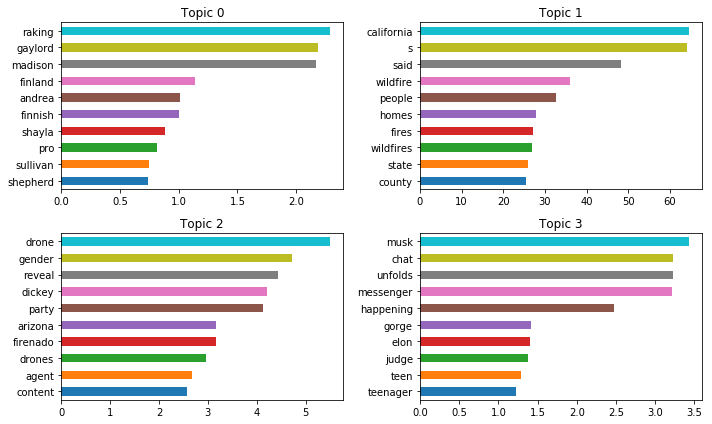

In [159]:
display_topics(wildfire_model, wf_vect.get_feature_names(), plot = True)

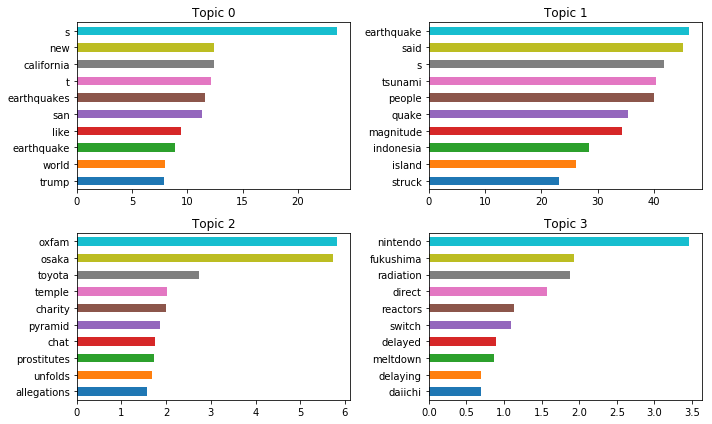

In [160]:
display_topics(earthquake_model, eq_vect.get_feature_names(), plot = True)

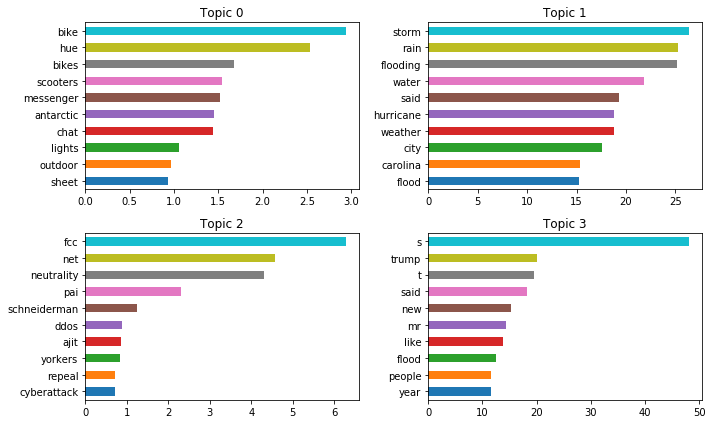

In [161]:
display_topics(flood_model, fl_vect.get_feature_names(), plot = True)

In [162]:
wf_words = wildfire_model.transform(wildfire_tf)
wildfire_doc_topics = pd.DataFrame(wf_words, columns=["topic %d" % i for i in range(wf_words.shape[1])])
top_wftopics = (wildfire_doc_topics['topic 1'] > .3)
wf_articles = wildfire_doc_topics[top_wftopics].index

wf_df = df_wildfire.loc[wf_articles]
# sorted_wildfires = wf_df.sort_values(by = 'publishedAt', ascending =False)
# sorted_wildfires.drop(['content', 'text'], axis = 1, inplace= True)

In [163]:
wf_df.shape

(874, 5)

In [164]:
eq_words = earthquake_model.transform(earthquake_tf)
earthquake_doc_topics = pd.DataFrame(eq_words, columns=["topic %d" % i for i in range(eq_words.shape[1])])
top_eqtopics = (earthquake_doc_topics['topic 1'] > .3)
eq_articles = earthquake_doc_topics[top_eqtopics].index

eq_df = df_earthquake.loc[eq_articles]
# sorted_earthquakes = eq_df.sort_values(by = 'publishedAt', ascending =False)
# sorted_earthquakes.drop(['content', 'text'], axis = 1, inplace= True)

In [165]:
eq_df.shape

(747, 5)

In [166]:
fl_words = flood_model.transform(flood_tf)
flood_doc_topics = pd.DataFrame(fl_words, columns=["topic %d" % i for i in range(eq_words.shape[1])])
top_fltopics = (flood_doc_topics['topic 1'] > .3)
fl_articles = flood_doc_topics[top_fltopics].index

fl_df = df_flood.loc[fl_articles]
# sorted_floods = fl_df.sort_values(by = 'publishedAt', ascending =False)
# sorted_floods.drop(['content', 'text'], axis = 1, inplace= True)

In [167]:
fl_df.shape

(427, 5)

## Pickle necessary objects for flask server

In [57]:
pickle.dump(wf_fit, open('../pickles/wildfire_vect.pk', 'wb'))

pickle.dump(eq_fit, open('../pickles/earthquake_vect.pk', 'wb'))

pickle.dump(fl_fit, open('../pickles/flood_vect.pk', 'wb'))